### Importing Libraries

In [8]:
import cv2
import numpy as np
import imageio as iio
from matplotlib import pyplot as plt

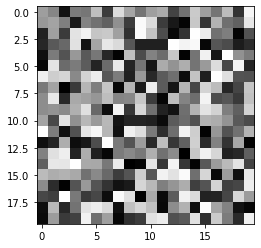

In [9]:
N = 20
img = np.random.randint(1,255,size=(N,N))
plt.imshow(img,cmap="gray");

In [10]:
def Unary(num): # 5 -> 111110
    b = []
    for i in range(num):
        b.append(1) #set "num" ones
    b.append(0) #just one zero in the end
    return(b)
#print(Unary(5))

def binary(num,bits): # 2,5 -> 00010
    b = []
    out = bin(num)
    for i in range(bits-len(out)+2):
        b.append(0) #left zeros of binary number for setting bits as wanted
    for i in range(len(out)-2):
        b.append(int(out[i+2])) #binery number
    return b
#print(binary(2,5))

In [11]:
def encode(img,m=20):
    k = int(np.ceil(np.log2(m)))
    c = int(2**k-m)
    #print(m,k,c)
    #print(bin(c))
    encoded = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            numb = img[i,j]
            q = numb//m # q
            r = numb - q*m # r
            qcode = Unary(q) # q codded unary
            if r<c:
                rcode = binary(r,k-1) # r<c codded in k-1 bits
            else :
                rcode = binary(r+c,k) # r>c codded in k bits
            code = qcode + rcode
            #print(q,qcode,r,rcode,code)
            encoded += code # adding each number code to the whole codes
    #print("encoded =",encoded)
    return encoded

In [12]:
def decode(x,m=20):
    k = int(np.ceil(np.log2(m)))
    c = int(2**k-m)
    img = []
    i = 0
    while i<len(x):
        #print(x[i],end='')
        q = 0
        while x[i+q]==1: # count ones
            q+=1
        i+=q+1 # jump to rcoded part
        if x[i:i+k-1]<binary(c,k-1): # check if r part is k bit or k-1
            #print(q,x[i:i+k-1])
            r = num(x[i:i+k-1])
            i+=k-1
        else :
            #print(q,x[i:i+k])
            r = num(x[i:i+k])-c
            i+=k
        #print(q,r)
        img.append(q*m+r) # final number
    return np.array(img)

def num(listt): #[0,0,1,0] -> 2
    out = 0
    for i in range(len(listt)):
        out+=listt[len(listt)-1-i]*2**i # decimal number of binary list 
    return out

In [13]:
m = int(np.random.randint(4,255,size=1)) # random m for codding
encoded = encode(img,m)
output = decode(encoded,m).reshape((N,N))
print("m =",m,"Lostless :",(sum(sum(output-img)))==0)

m = 239 Lostless : True


#### Extra unwanted part : calculation of optimal m, and lowest bits needed for each pixel ≈ 8.4

In [14]:
bits = np.zeros((18,10))
least = np.zeros(18)
for i in range(18):
    for j in range(10):
        N = 20+j*7
        img = np.random.randint(1,255,size=(N,N))
        m = 7*i+60
        encoded = encode(img,m)
        bits[i,j] = len(encoded)/N**2
        #print(m,len(encoded),8*N**2)
        output = decode(encoded,m).reshape((N,N));
        print(sum(sum(output-img)),end='')
    k = np.argmin(bits[i])
    least[i] = bits[i,k]
    print(" at N =",k*7+20,"needed bits per pixel :",bits[i,k])
print()
#print(bits)
k = np.argmin(least)
print("best m =",k*7+60,"lowest bits needed per pixel :",least[k])

0000000000 at N = 41 needed bits per pixel : 8.53955978584176
0000000000 at N = 20 needed bits per pixel : 8.455
0000000000 at N = 20 needed bits per pixel : 8.4825
0000000000 at N = 27 needed bits per pixel : 8.48559670781893
0000000000 at N = 27 needed bits per pixel : 8.460905349794238
0000000000 at N = 20 needed bits per pixel : 8.4625
0000000000 at N = 34 needed bits per pixel : 8.46712802768166
0000000000 at N = 48 needed bits per pixel : 8.460503472222221
0000000000 at N = 55 needed bits per pixel : 8.47107438016529
0000000000 at N = 69 needed bits per pixel : 8.488342785129175
0000000000 at N = 48 needed bits per pixel : 8.495659722222221
0000000000 at N = 27 needed bits per pixel : 8.506172839506172
0000000000 at N = 55 needed bits per pixel : 8.549421487603306
0000000000 at N = 20 needed bits per pixel : 8.57
0000000000 at N = 20 needed bits per pixel : 8.6025
0000000000 at N = 20 needed bits per pixel : 8.6125
0000000000 at N = 20 needed bits per pixel : 8.65
0000000000 at N